<span style="font-size:8pt"><i>ENSAM-Bordeaux, Mathématiques et informatique. Date : le 17/11/22. Auteur : Éric Ducasse. Version : 1.3</i></span>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sympy as sb
sb.init_printing()
from IPython.display import display

In [4]:
print("Version de sympy : ", sb.__version__) 

Version de sympy :  1.11.1


# <span style="color:#0066BB"> **Calcul formel : TD n°2, seconde partie** </span>

<div class="alert alert-block alert-danger"> <span style="color:#800000"> <b>Pour chaque exercice, faire exécuter la partie <i>exemples</i> cellule par cellule <tt>(Maj+Entrée)</tt>, avant de passer à la partie <i>Travail à faire</i>.</b> </span> </div>

## <span style="color: #0000BB"> *Exercice 12* </span>

### <span style="color:purple"> 12.1 Objectifs </span>

####  <span style="color:#005500"><i>Savoir définir et résoudre un système d'équations algébriques, en utilisant la fonction</i> <span style="color:#604000;font-size:12pt"><tt><b>sympy.solve</b></tt></span> <i>;<br /> savoir utiliser le résultat d’un calcul symbolique pour créer une fonction, en maîtrisant la fonction</i> <span style="color:#604000;font-size:12pt"><tt><b>sympy.lambdify</b></tt></span>. </span>

Documentation sur les équations et les solveurs :<br />https://docs.sympy.org/latest/tutorial/solvers.html

Documentation sur $\mathtt{lambdify}$ :<br />https://docs.sympy.org/latest/tutorial/basic_operations.html#lambdify

### <span style="color:purple"> 12.2 Exemples </span>

#### Problème à résoudre : déterminer les paramètres $a$ et $b$ d'une fonction paramétrée pour satisfaire des conditions initiales données.

<span style="color:#006020">*$a)$ Définition d'une expression représentant une fonction de la variable $t$ avec 4 paramètres $a$, $b$, $\omega$ et $\tau$.*</span>

In [5]:
a,b,t = sb.symbols("a,b,t", real=True)
w,tau = sb.symbols("omega,tau", positive=True)
U_de_t = ( a*sb.cos(w*t) + b*sb.sin(w*t) ) * sb.exp(-t/tau)
U_de_t

<span style="color:#006020">*$b)$ Valeurs initiales de la fonction et de sa dérivée.*</span>

In [6]:
valeur_initiale = U_de_t.replace(t,0) ; valeur_initiale

In [7]:
derivee_initiale = U_de_t.diff(t).replace(t,0) ; derivee_initiale

<span style="color:#006020">*$c)$ Détermination des paramètres $a$ et $b$ qui permettent à la fonction de satisfaire des conditions initiales données.*</span>

In [8]:
u0,v0 = sb.symbols("u_0,v_0")
equations = [sb.Eq(valeur_initiale,u0), sb.Eq(derivee_initiale,v0)]
equations

In [9]:
regle_ab = sb.solve(equations, [a,b]) ; regle_ab

<span style="color:#006020">*$d)$ Solution du problème.*</span>

In [10]:
solu = U_de_t.xreplace(regle_ab).simplify()
solu

<span style="color:#006020">*$e)$ Définition de fonctions utilisant le dernier résultat.*</span>

La fonction <span style="color:#604000;font-size:12pt"><tt><b>lambdify</b></tt></span> est faite pour définir une fonction à valeurs numériques :

In [11]:
print(sb.lambdify.__doc__[:817])

Convert a SymPy expression into a function that allows for fast
    numeric evaluation.

    .. warning::
       This function uses ``exec``, and thus should not be used on
       unsanitized input.

    .. deprecated:: 1.7
       Passing a set for the *args* parameter is deprecated as sets are
       unordered. Use an ordered iterable such as a list or tuple.

    Explanation

    For example, to convert the SymPy expression ``sin(x) + cos(x)`` to an
    equivalent NumPy function that numerically evaluates it:

    >>> from sympy import sin, cos, symbols, lambdify
    >>> import numpy as np
    >>> x = symbols('x')
    >>> expr = sin(x) + cos(x)
    >>> expr
    sin(x) + cos(x)
    >>> f = lambdify(x, expr, 'numpy')
    >>> a = np.array([1, 2])
    >>> f(a)
    [1.38177329 0.49315059]

   


* <span style="color:#0050A0"><b>Fonction à valeurs symboliques : on utilise <span style="color:#604000;font-size:12pt"><tt>xreplace</tt></span></b></span>

In [12]:
alpha,f = sb.symbols("alpha,f", positive=True)
solu.xreplace({tau:1/alpha, w:2*sb.pi*f}).simplify()

In [13]:
def Us(time, initial_value=1, initial_derivative=0, frequency=1, time_constant=1, expression=solu) : 
    regle = {u0:initial_value, v0:initial_derivative, w:sb.pi*2*frequency, tau:time_constant}
    return expression.xreplace(regle).simplify()
# Remarque : on peut aussi définir une fonction lambda, avec des performances identiques
Us(t)

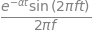

In [14]:
Us(t, frequency=f, time_constant=1/alpha, initial_value=0, initial_derivative=1)

* <span style="color:#0050A0">**Fonction vectorisée à valeurs numériques**</span>

Avec <span style="color:#604000;font-size:12pt"><b><tt>lambdify</tt></b></span>, on ne peut pas définir de valeurs par défaut.
Si on veut le faire, il faut procéder en deux temps, comme ci-dessous.

In [15]:
u_numerique = sb.lambdify( (t, u0, v0, w, tau), solu, "numpy")

In [16]:
T = np.arange(0, 1.01, 0.2)
print( np.array( [ T , u_numerique(T, 1, 0, 2*np.pi, 1) ] ) )

[[ 0.          0.2         0.4         0.6         0.8         1.        ]
 [ 1.          0.37692918 -0.47959259 -0.49533868  0.07083745  0.36787944]]


#### <span style="color:#005000"> Rappel : le mot-clef <span style="color:#803000;font-size:12pt"><b><tt>lambda</tt></b></span> permet de définir une fonction autrement qu'avec un bloc <span style="color:#803000;font-size:12pt"><b><tt>def</tt></b></span> :</span>

In [17]:
Un = lambda t, u0=1, v0=0, w=2*np.pi, tau=1 : u_numerique(t, u0, v0, w, tau)
print( np.array( [T, Un(T)] ) )

[[ 0.          0.2         0.4         0.6         0.8         1.        ]
 [ 1.          0.37692918 -0.47959259 -0.49533868  0.07083745  0.36787944]]


#### <span style="color:#005000"> Définition standard avec un bloc <span style="color:#803000;font-size:12pt"><b><tt>def</tt></b></span> :</span>

In [18]:
def Un_classique(t, u0=1, v0=0, w=2*np.pi, tau=1) :
    return u_numerique(t, u0, v0, w, tau)
print( np.array( [T, Un_classique(T)] ) )

[[ 0.          0.2         0.4         0.6         0.8         1.        ]
 [ 1.          0.37692918 -0.47959259 -0.49533868  0.07083745  0.36787944]]


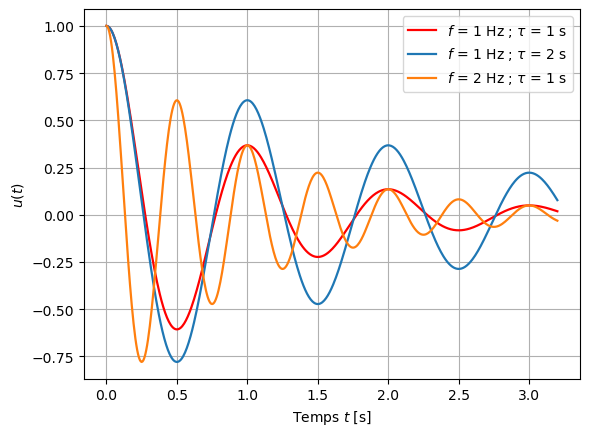

In [19]:
Vt = np.linspace(0, 3.2, 500)
plt.plot(Vt, Un(Vt), "-r", linewidth=1.6, label=r"$f$ = 1 Hz ; $\tau$ = 1 s")
for fq,ct in ( (1,2), (2,1) ) :
    plt.plot(Vt, Un(Vt, w=2*np.pi*fq, tau=ct), "-", linewidth=1.6, \
             label=r"$f$ = {} Hz ; $\tau$ = {} s".format(fq,ct))
plt.grid() ; plt.legend() ; plt.xlabel("Temps $t$ [s]") ; plt.ylabel("$u(t)$") ;

### <span style="color:purple"> 12.3 Travail à faire </span>

L'objet de cet exercice est de définir 4 fonctions $p$ polynomiales de degré 3, que l'on considère uniquement sur l'intervalle $[0,1]$ telles que l'une des valeurs parmi $[p(0),p^{\prime}(0),p(1),p^{\prime}(1)]$ est 1 et les trois autres sont 0.

$a)$ Soit l'expression $P=p(X)=a+b\,X+c\,X^2+d\,X^3$. Déterminer la liste $[p(0),p^{\prime}(0),p(1),p^{\prime}(1)]$ en fonction des paramètres $a$, $b$, $c$ et $d$.

In [28]:
a,b,c,d,X = sb.symbols("a,b,c,d,X")
P =  a + b*X + c*X**2 +d*X**3
P

In [33]:
equations1 = [ sb.Eq( P.replace(X,0), 1 ) , \
               sb.Eq( P.diff(X).replace(X,0), 0 ) , \
               sb.Eq( P.replace(X,1), 0 ) , \
               sb.Eq( P.diff(X).replace(X,1), 0 ) ]
equations1

In [45]:
equations2 = [ sb.Eq( P.replace(X,0), 0 ) , \
               sb.Eq( P.diff(X).replace(X,0), 1 ) , \
               sb.Eq( P.replace(X,1), 0 ) , \
               sb.Eq( P.diff(X).replace(X,1), 0 ) ]
equations2

In [46]:
equations3 = [ sb.Eq( P.replace(X,0), 0 ) , \
               sb.Eq( P.diff(X).replace(X,0), 0 ) , \
               sb.Eq( P.replace(X,1), 1 ) , \
               sb.Eq( P.diff(X).replace(X,1), 0 ) ]
equations3

In [47]:
equations4 = [ sb.Eq( P.replace(X,0), 0 ) , \
               sb.Eq( P.diff(X).replace(X,0), 0 ) , \
               sb.Eq( P.replace(X,1), 0 ) , \
               sb.Eq( P.diff(X).replace(X,1), 1 ) ]
equations4

$b)$ En déduire les expressions correspondants aux 4 fonctions cherchées.

In [34]:
dico1 = sb.solve( equations1, (a,b,c,d) )
dico1

In [48]:
dico2 = sb.solve( equations2, (a,b,c,d) )
dico2

In [49]:
dico3 = sb.solve( equations3, (a,b,c,d) )
dico3

In [50]:
dico4 = sb.solve( equations4, (a,b,c,d) )
dico4

In [52]:
P1 = P.xreplace( dico1 ).factor()
P2 = P.xreplace( dico2 ).factor()
P3 = P.xreplace( dico3 ).factor()
P4 = P.xreplace( dico4 ).factor()
P1,P2,P3,P4

$c)$ Convertir ces expressions en 4 fonctions numériques et faire tracer leurs courbes représentatives sur l'intervalle $[0,1]$.

In [40]:
p1_num = sb.lambdify( X, P1, "numpy" )

In [53]:
p2_num = sb.lambdify( X, P2, "numpy" )

In [54]:
p3_num = sb.lambdify( X, P3, "numpy" )

In [55]:
p4_num = sb.lambdify( X, P4, "numpy" )

In [57]:
Vx = np.linspace(0,1,6) ; Vx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [58]:
p1_num( Vx ),p2_num( Vx ),p3_num( Vx ),p4_num( Vx )

(array([1.   , 0.896, 0.648, 0.352, 0.104, 0.   ]),
 array([0.   , 0.128, 0.144, 0.096, 0.032, 0.   ]),
 array([0.   , 0.104, 0.352, 0.648, 0.896, 1.   ]),
 array([-0.   , -0.032, -0.096, -0.144, -0.128,  0.   ]))

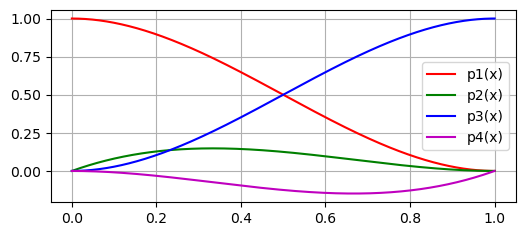

In [59]:
Vx = np.linspace(0,1,1000)
plt.figure( figsize=(6,2.5) )
plt.plot( Vx, p1_num(Vx), "-r", label="p1(x)" )
plt.plot( Vx, p2_num(Vx), "-g", label="p2(x)" )
plt.plot( Vx, p3_num(Vx), "-b", label="p3(x)" )
plt.plot( Vx, p4_num(Vx), "-m", label="p4(x)" )
plt.grid() ; plt.legend() ;

## <span style="color: #0000BB"> *Exercice 13* </span>

### <span style="color:purple"> 13.1 Travail à faire </span>

On s'intéresse à la solution $f$ du système différentiel $(1)$ suivant : $\displaystyle \left\lbrace\begin{array}{lll} \forall r\in]0,2], & \displaystyle f^{\prime\prime}(r)+\frac{1}{r}\,f^{\prime}(r)+25\,f(r)=0&; \\ \forall r\in]2,5[ & 
\displaystyle f^{\prime\prime}(r)+\frac{1}{r}\,f^{\prime}(r)+4\,f(r)=0&.\end{array}\right.$<br />la solution $f$ étant de classe $\mathcal{C}^{1}$ sur l'intervalle $[0,5]$ et vérifiant les conditions aux limites : $f^{\prime}(0)=0$ et $f(5)=1$.

On admet que la solution générale de l'équation différentielle $\displaystyle f^{\prime\prime}(r)+\frac{1}{r}\,f^{\prime}(r)+k^2\,f(r)=0$ est une combinaison linéaire des deux fonctions $r\mapsto J_0(k\,r)$ et
$r\mapsto Y_0(k\,r)$, où $J_0$ et $Y_0$ désignent les fonctions de Bessel de première et de seconde espèces :

In [20]:
r,k = sb.symbols("r,k", real=True, nonnegative=True)
S1,S2 = sb.besselj(0, k*r), sb.bessely(0, k*r)
(S1,S2)

In [21]:
[ (S.diff(r,2) + (1/r)*S.diff(r) + k**2*S ).equals(0) for S in (S1,S2) ]

[True, True]

L'étude de ces deux fonctions en $r=0$ donne les résultats suivants :

In [22]:
S1.replace(r,0), S1.diff(r).replace(r,0), S2.limit(r,0)

On en déduit la solution générale du problème différentiel :

* Sur l'intervalle $[0,2]$ :

In [23]:
a,b,c = sb.symbols("a,b,c", real=True)
F1 = a*sb.besselj(0, 5*r) ; F1

* Sur l'intervalle $[2,5]$ :

In [24]:
F2 = b*sb.besselj(0, 2*r) + c*sb.bessely(0, 2*r) ; F2

$a)$ Vérifier que la solution proposée satisfait bien la condition limite à gauche. Définir ensuite un système de 3 équations à 3 inconnues $a$, $b$ et $c$ à partir des conditions de raccordement en $r=2$ de la fonction et de sa dérivée, et de la condition limite à droite.

$b)$ En déduire les coefficients $a$, $b$ et $c$ qui satisfont le problème différentiel $(1)$, puis la solution sur chacun des intervalles $[0,2]$ et $[2,5]$.

$c)$ Définir la solution sous forme d'une fonction numérique vectorisée <span style="color:#604000;font-size:12pt"><b><tt>f_num</tt></b></span> puis faire tracer sa courbe représentative. Les fonctions de Bessel numériques se trouvent dans le module <span style="color:#604000;font-size:12pt"><b><tt>scipy.special</tt></b></span> et se nomment <span style="color:#604000;font-size:12pt"><b><tt>jn</tt></b></span> et <span style="color:#604000;font-size:12pt"><b><tt>yn</tt></b></span>.

In [25]:
import scipy.special as sf
M = ["numpy",{"besselj":sf.jn, "bessely":sf.yn}]
M

['numpy', {'besselj': <ufunc 'jv'>, 'bessely': <ufunc 'yn'>}]

<u>Indication</u> : dans l'appel de la fonction <tt><b>sympy.lambdify</b></tt>, on remplacera la chaîne <tt><b>"numpy"</b></tt> par la liste <tt><b>M</b></tt> définie ci-dessus.